In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import random

# Grid setup
GRID_SIZE = 5
GOLD = (3, 3)
TRAPS = [(2, 3), (3, 2), (2, 2)]
# Accions possibles: amunt, avall , esquerra, dreta
ACTIONS = [(-1,0), (1,0), (0,-1), (0,1)]

In [3]:
# Recompenses
def get_reward(state):
	if state == GOLD:
		return 1
	elif state in TRAPS:
		return -1
	else:
		return -0.01  # petita penalització per afavorir camins curts

def valid_state(state):
	return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

def step(state, action):
	new_state = (state[0] + action[0], state[1] + action[1])
	if valid_state(new_state):
		return new_state
	return state

In [4]:
# Q-learning parameters
Q = {}
alpha = 0.1
gamma = 0.9
epsilon = 0.2
episodes = 500

In [5]:
# Entrenament
for _ in range(episodes):
	state = (0, 0)
	while state != GOLD and state not in TRAPS:
		if state not in Q:
			Q[state] = np.zeros(len(ACTIONS))
		if random.random() < epsilon:
			action_idx = random.randint(0, len(ACTIONS) - 1)
		else:
			action_idx = np.argmax(Q[state])
		action = ACTIONS[action_idx]
		new_state = step(state, action)
		reward = get_reward(new_state)
		if new_state not in Q:
			Q[new_state] = np.zeros(len(ACTIONS))
		Q[state][action_idx] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state][action_idx])
		state = new_state

In [6]:
# Millor trajectòria
def get_best_trajectory(start=(0, 0)):
	path = [start]
	state = start
	while state != GOLD and state not in TRAPS:
		if state not in Q:
			break
		action = ACTIONS[np.argmax(Q[state])]
		next_state = step(state, action)
		if next_state == state or next_state in path:
			break  # avoid loops
		path.append(next_state)
		state = next_state
	return path

trajectory = get_best_trajectory()

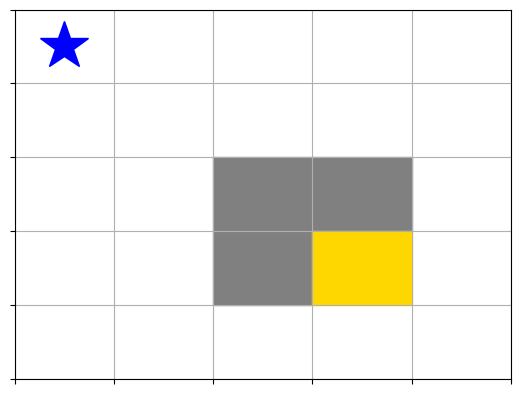

In [7]:
# Animació
fig, ax = plt.subplots()
def draw_grid(agent_pos):
	ax.clear()
	ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1))
	ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1))
	ax.set_xticklabels([])
	ax.set_yticklabels([])
	ax.grid(True)
	ax.set_xlim(-0.5, GRID_SIZE - 0.5)
	ax.set_ylim(-0.5, GRID_SIZE - 0.5)

	# Cel.les
	for i in range(GRID_SIZE):
		for j in range(GRID_SIZE):
			y = GRID_SIZE - 1 - i
			if (i, j) == GOLD:
					ax.add_patch(plt.Rectangle((j - 0.5, y - 0.5), 1, 1, color='gold'))
			elif (i, j) in TRAPS:
					ax.add_patch(plt.Rectangle((j - 0.5, y - 0.5), 1, 1, color='gray'))

	# Agent
	y = GRID_SIZE - 1 - agent_pos[0]
	x = agent_pos[1]
	ax.plot(x, y, 'b*', markersize=36)

def update(frame):
	draw_grid(trajectory[frame])

anim = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=700)
HTML(anim.to_jshtml())